# 顔抽出プログラム

In [202]:
import cv2
import numpy as np
import glob
import os
%matplotlib inline
import matplotlib.pyplot as plt

#顔検出モデル
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

# 画像フォルダから全ファイルのパスを取得

In [203]:
#全ファイルパスを取得
file_path_list=glob.glob('scraping/temp/mugshot/*.jpg')

# 指定フォルダ内の全画像の顔切り取り→保存

In [215]:
file_num=0 #ファイル名番号

for file_path in file_path_list:
    
    #ファイル名取得
    file_name=os.path.basename(file_path)
    #print(file_name)
    
    #読み込み
    img=cv2.imread('scraping/temp/mugshot/'+file_name)
    
    #正常に読み込めていれば
    if str(type(img)) != "<class 'NoneType'>":
        #顔検出
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # 検出した場合
        if len(faces) > 0:

            #座標から矩形領域の切り取り
            for (x,y,w,h) in faces:

                #新しい配列に入力画像の一部を代入
                dst = img[y:y+h,x:x+w]

                #グレースケール化し書き出し
                dst_gray=cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
                cv2.imwrite('dataset/criminals/'+str(file_num)+'.jpg',dst_gray)
                file_num+=1
               # plt.figure(figsize=(10, 10), dpi=10)
                #plt.imshow(cv2.cvtColor(dst_gray, cv2.COLOR_BGR2RGB))
            

# 画像読み込み

In [213]:
img=cv2.imread('scraping/temp/mugshot/0064.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(str(type(img)))

<class 'NoneType'>


# 顔検出→座標取得

In [153]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

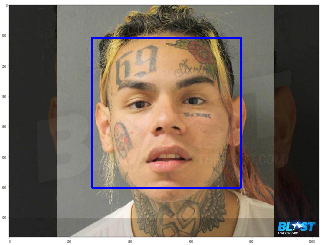

In [154]:
plt.figure(figsize=(20, 20), dpi=20)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 切り取り

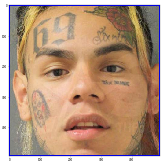

In [155]:
#新しい配列に入力画像の一部を代入
dst = img[y:y+h,x:x+w]

#書き出し
plt.figure(figsize=(10, 10), dpi=20)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))